# EDA Task for Automobile Dataset

This notebook will have the code used to prepare and clean the data. A more formal report will acompany this notebook.

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read data
athlete_df = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv", encoding = "ISO-8859-1", engine = "python")
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [120]:
athlete_df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [121]:
athlete_df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

Year is an int64 object here, it would be more appropriate to have it as a datetime.

In [122]:
athlete_df['Year'] = pd.to_numeric(athlete_df['Year'])

In [123]:
athlete_df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [124]:
len(athlete_df['Name'].unique())

82

Dataset contains information on 82 athletes.

In [125]:
athlete_df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

We should tread carefully here, as it is possible that an athelete has improved and was not ranked like year but has become ranked now. This could explain the missing values.

In [126]:
len(athlete_df)

301

In [127]:
athlete_df.loc[athlete_df['Name'] == "Mike Tyson"]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
11,12,Mike Tyson,USA,2,1,boxing,1991,31.5
51,52,Mike Tyson,USA,2,not ranked,boxing,1995,40.0
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
74,75,Mike Tyson,USA,5,1,Boxing,1997,27.0
95,96,Mike Tyson,USA,6,>10,Boxing,1999,33.0
102,103,Mike Tyson,USA,3,6,Boxing,2000,48.0
116,117,Mike Tyson,USA,7,3,Boxing,2002,23.0


In [128]:
athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].str.replace(">", "")
athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].str.replace("none", "")
athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].str.replace("not ranked", "")
athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].str.replace("?", "")
athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].replace("", np.NAN)

C:\Users\pittr\AppData\Local\Temp\ipykernel_10040\566634259.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  athlete_df['Previous Year Rank'] = athlete_df['Previous Year Rank'].str.replace("?", "")


In [129]:
athlete_df['Previous Year Rank'].unique()

array([nan, '8', '1', '30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '40', '19', '7', '11', '22', '20', '38', '2', '15', '14',
       '26', '18', '24', '21', '100'], dtype=object)

In [130]:
athlete_df['Previous Year Rank'] = pd.to_numeric(athlete_df['Previous Year Rank'])

In [131]:
athlete_df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank      float64
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [132]:
athlete_df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      34
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

By collecting the pseudo-null values like "none" or  "?" we have increased the recorded null values by 10 or so, but have actually not changed the information in the dataset, now we can deal with the nullvalues.

I will next find all the indexes that contain null values in PYR and remove those indexes from the dataset.

In [133]:
missing = athlete_df['Previous Year Rank'].loc[athlete_df['Previous Year Rank'].isnull() == True]

In [134]:
missing_index = missing.index

In [135]:
missing_index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  51,  53,  64,
             68,  78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89, 211,
            225, 226, 266, 268, 269, 270, 286, 287],
           dtype='int64')

In [136]:
len(athlete_df)

301

In [137]:
athlete_df.drop(missing_index, axis = 0, inplace = True)

In [138]:
len(athlete_df)

267

In [139]:
len(athlete_df) + len(missing_index)

301

Successfully removed null values

In [140]:
athlete_df['Sport'].unique()

array(['boxing', 'basketball', 'auto racing', 'golf', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [141]:
#boxing should be combined with "Boxing". nba is basketball, nfl is american football, the various car racing sports can be seperated into nascar, f1 or other
athlete_df['Sport'] = athlete_df['Sport'] = athlete_df['Sport'].str.lower()
athlete_df['Sport'] = athlete_df['Sport'].replace("auto racing (nascar)", "nascar")
athlete_df['Sport'] = athlete_df['Sport'].replace('nfl', 'american football')
athlete_df['Sport'] = athlete_df['Sport'].replace('nba', 'basketball')
athlete_df['Sport'] = athlete_df['Sport'].replace(['f1 racing', 'f1 motorsports'], 'f1')

In [142]:
athlete_df['Sport'].unique()

array(['boxing', 'basketball', 'auto racing', 'golf', 'tennis',
       'american football', 'baseball', 'ice hockey',
       'american football / baseball', 'f1', 'nascar', 'soccer',
       'cycling', 'motorcycle gp', 'mma'], dtype=object)

In [143]:
athlete_df['earnings ($ million)'].min()

8.5

In [144]:
athlete_df['earnings ($ million)'].max()

300.0

# Univariate Analysis

We can visualise some of the important variables in this section. I will be plotting graphs to show Country of origin, Sport and Name against the number of times that an athelete appears in the dataset. E.g. does USA have higher paid atheletes than others who appear in this set. Or does the sport have a higher amount of high earners compared to others. 

array([<AxesSubplot:ylabel='S.NO'>], dtype=object)

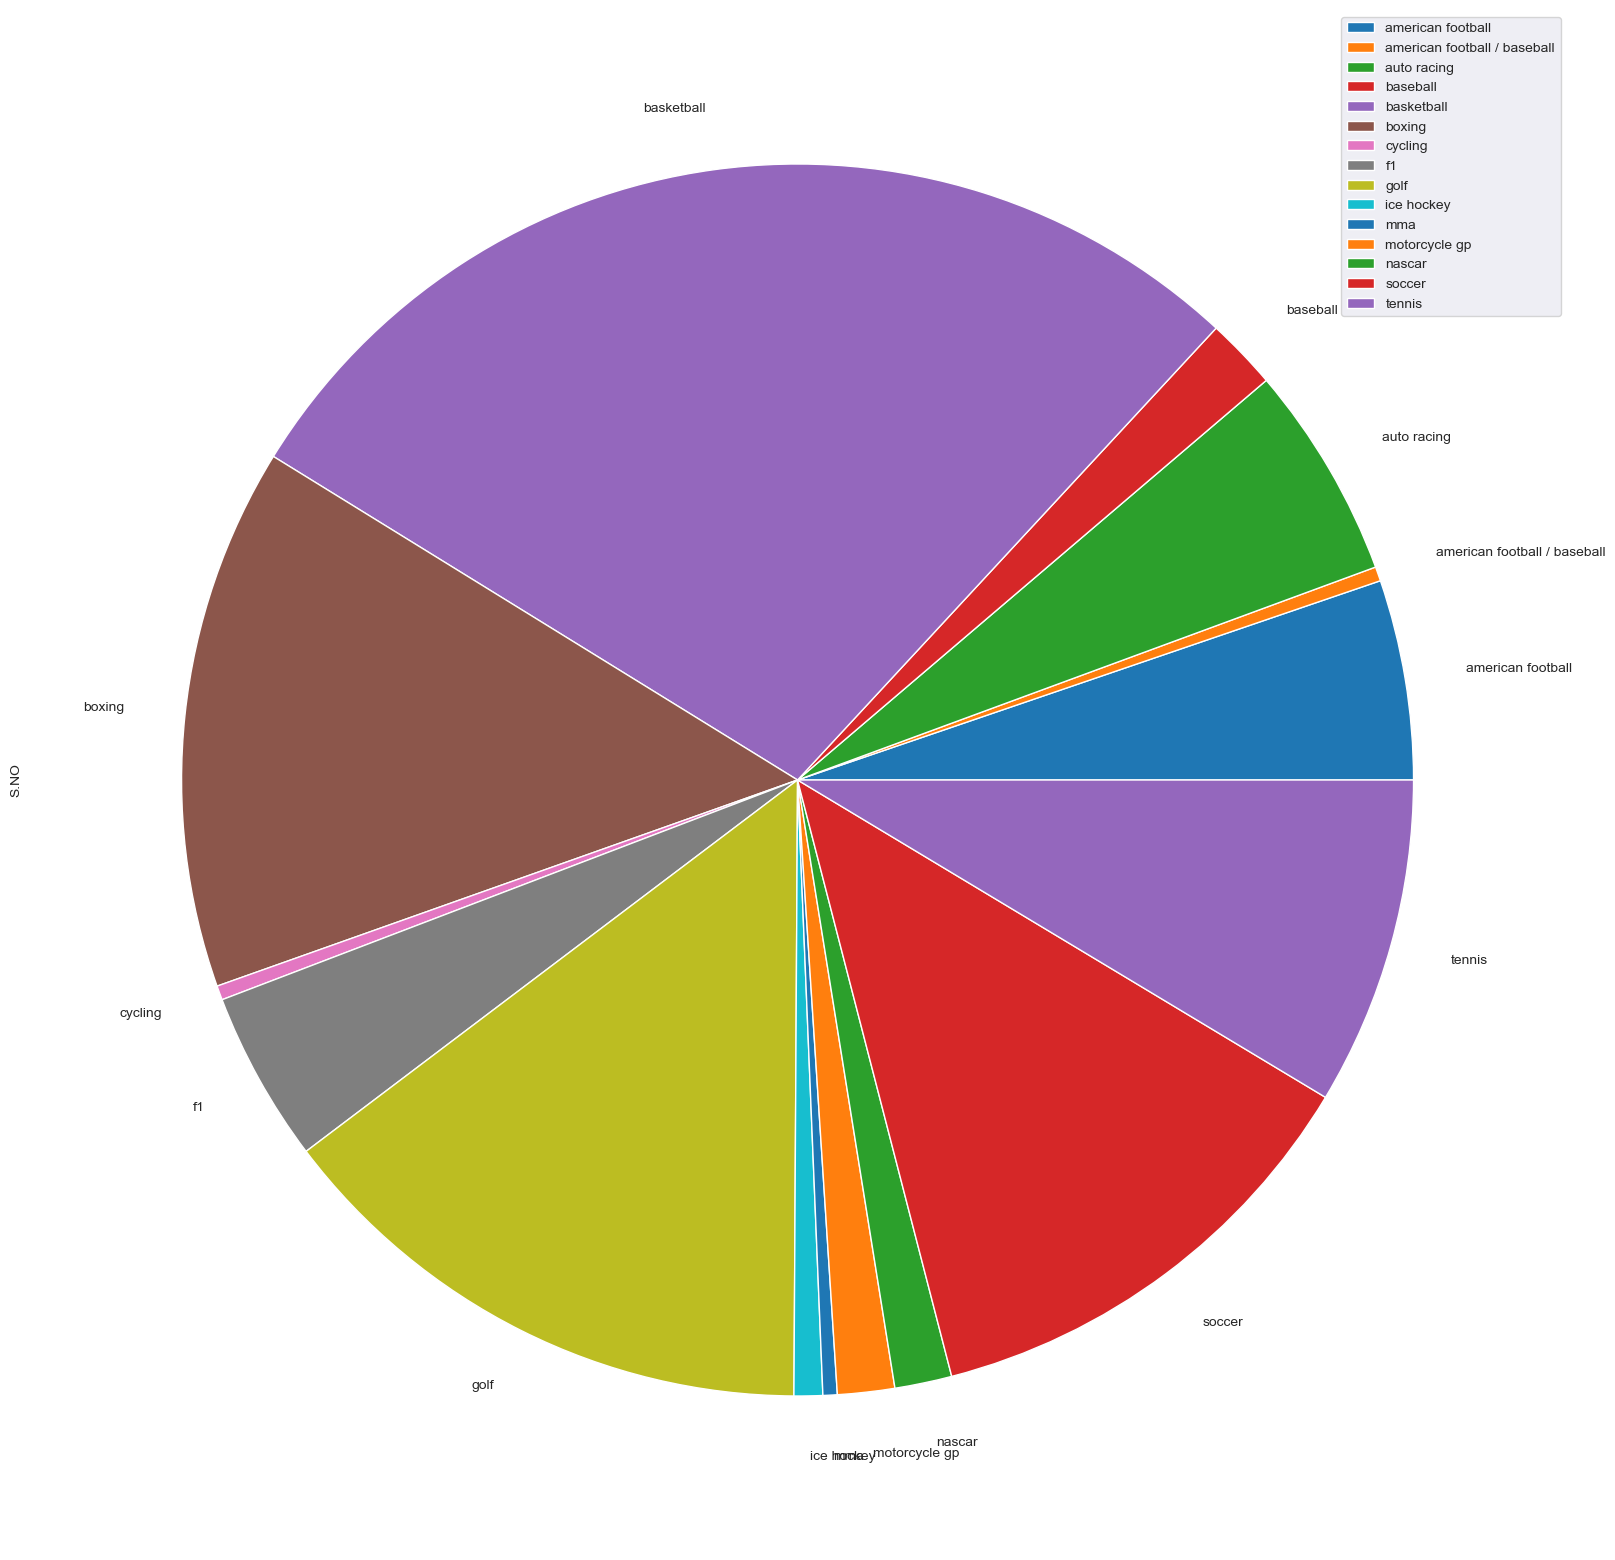

In [145]:
top_sports = athlete_df.groupby(by = 'Sport')
sports_count = top_sports.count()

sports_count = pd.DataFrame(sports_count.iloc[:,0])
sports_count.plot.pie(subplots = True, figsize = (20, 20))

In [146]:
top_sports.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
10,11,Evander Holyfield,USA,1,8.0,boxing,1991,60.5
11,12,Mike Tyson,USA,2,1.0,boxing,1991,31.5
12,13,Michael Jordan,USA,3,8.0,basketball,1991,16.0
13,14,George Foreman,USA,4,30.0,boxing,1991,14.5
14,15,Ayrton Senna,Brazil,5,4.0,auto racing,1991,13.0
15,16,Alain Prost,France,6,5.0,auto racing,1991,11.0
16,17,"Donovan ""Razor"" Ruddock",Canada,7,30.0,boxing,1991,10.2
17,18,Arnold Palmer,USA,8,8.0,golf,1991,9.3
18,19,Nigel Mansell,UK,9,12.0,auto racing,1991,9.0
19,20,Sugar Ray Leonard,USA,10,6.0,golf,1991,8.5


<AxesSubplot:title={'center':'Number of Athletes Present in Dataset Based on Nationality'}, xlabel='Nationality', ylabel='Count'>

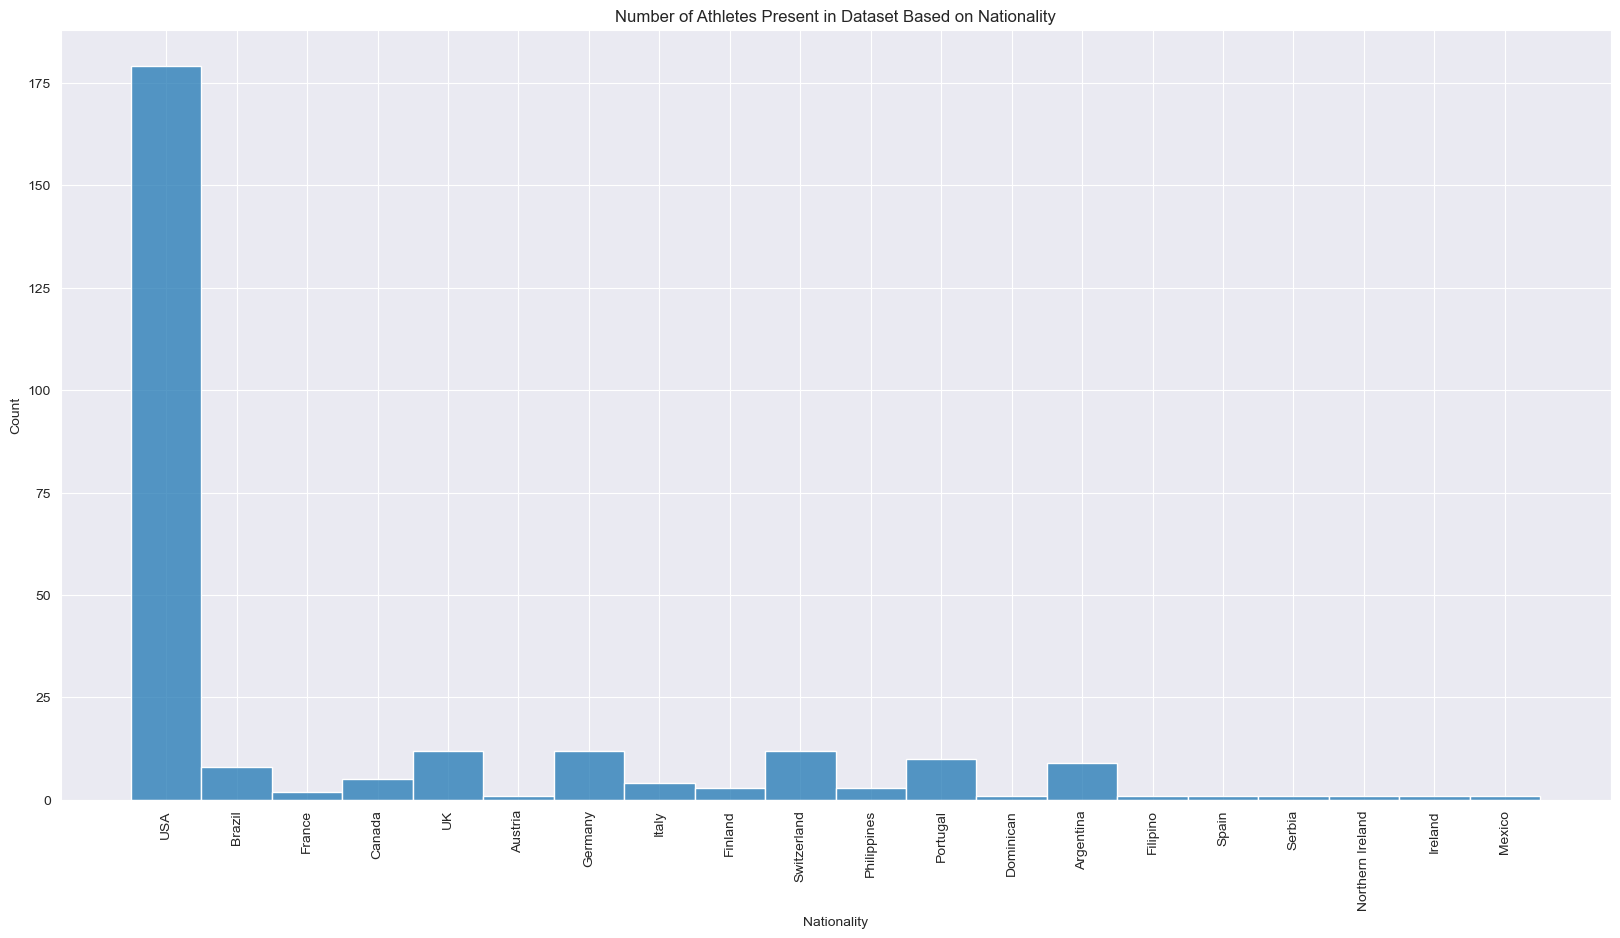

In [147]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)
plt.title("Number of Athletes Present in Dataset Based on Nationality")
sns.histplot(data = athlete_df, x = "Nationality")

In [169]:
athlete_df['Sport'].unique()

array(['boxing', 'basketball', 'auto racing', 'golf', 'tennis',
       'american football', 'baseball', 'ice hockey',
       'american football / baseball', 'f1', 'nascar', 'soccer',
       'cycling', 'motorcycle gp', 'mma'], dtype=object)

In [148]:
athlete_df['Nationality'].loc[athlete_df['Nationality'] == "Brazil"].count().sum()

8

In [149]:
athlete_df['Nationality'].loc[athlete_df['Nationality'] == "France"].count().sum()

2

In [150]:
athlete_df['Name'].loc[athlete_df['Nationality'] == "Portugal"].unique()

array(['Cristiano Ronaldo'], dtype=object)

<AxesSubplot:title={'center':'Number of Times Each Athlete has Appeared in the Dataset'}, xlabel='Name', ylabel='Count'>

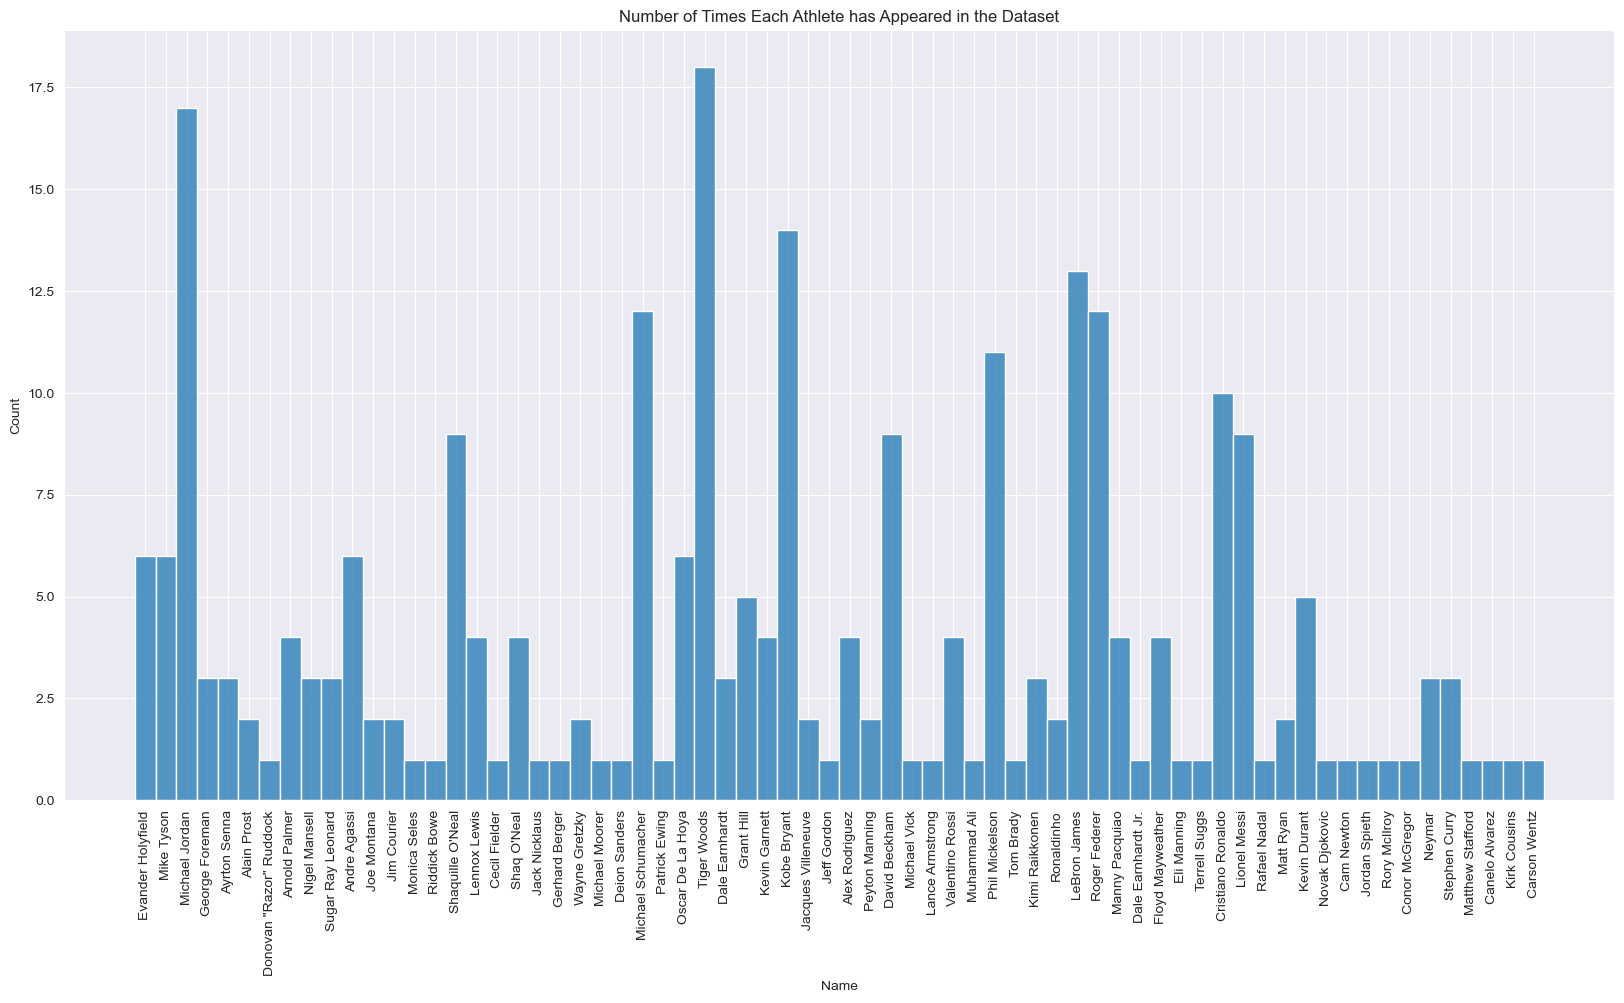

In [151]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)
plt.title("Number of Times Each Athlete has Appeared in the Dataset")
sns.histplot(data = athlete_df, x = 'Name')

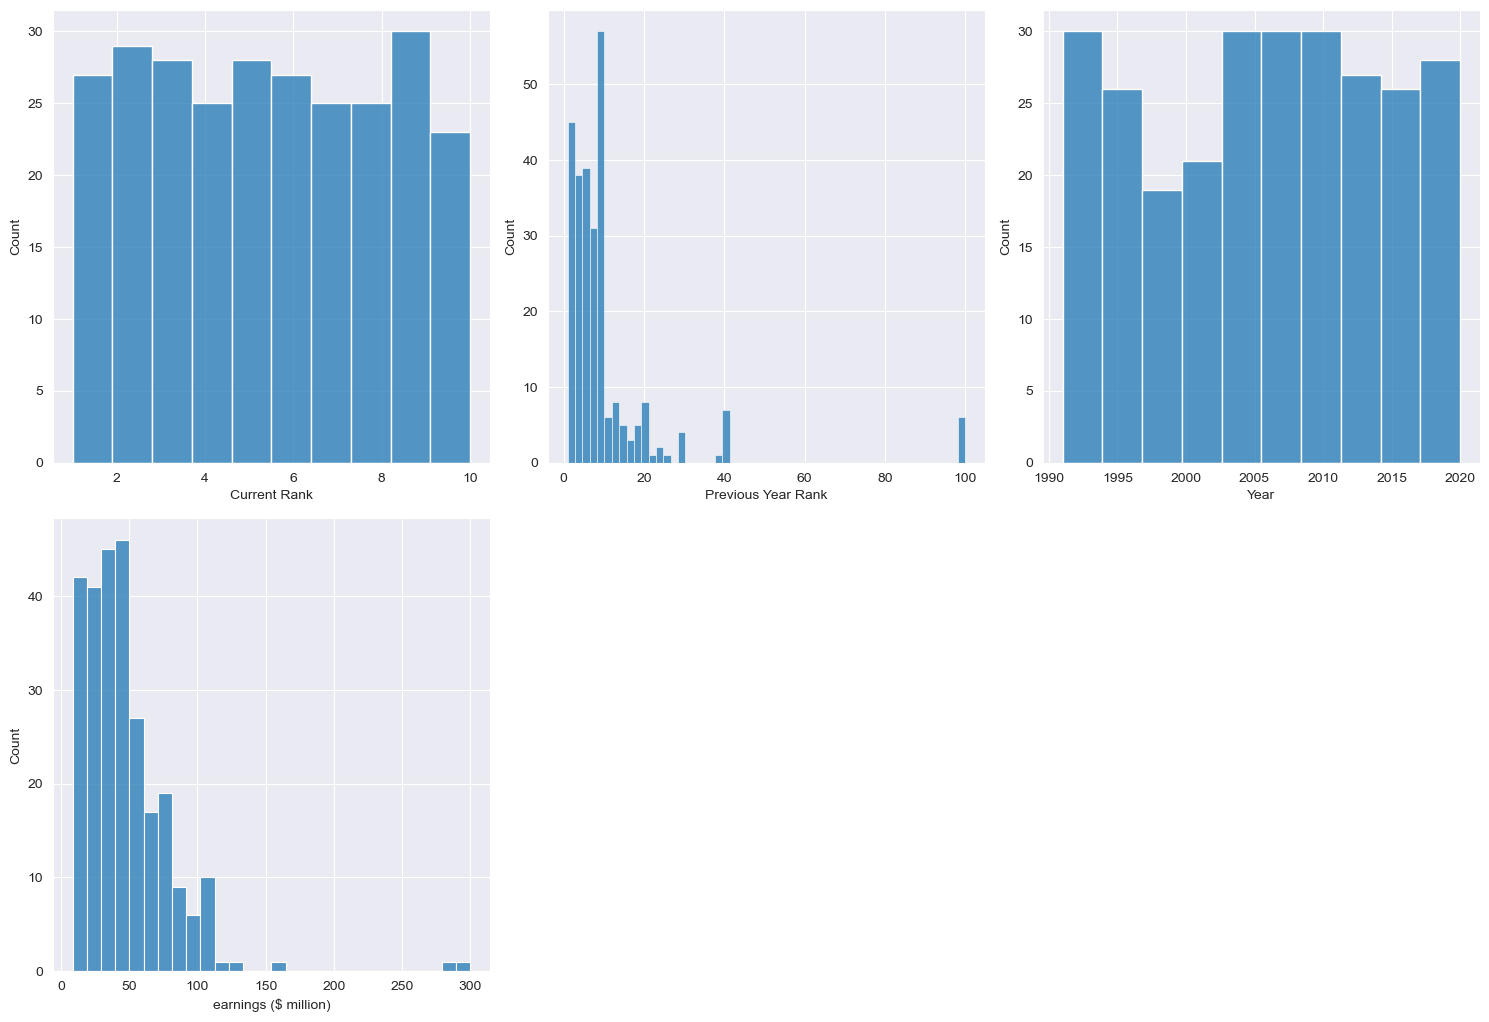

In [152]:
athlete_df.drop('S.NO', axis = 1 , inplace = True)
cols = 3
rows = 3
num_cols = athlete_df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = athlete_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

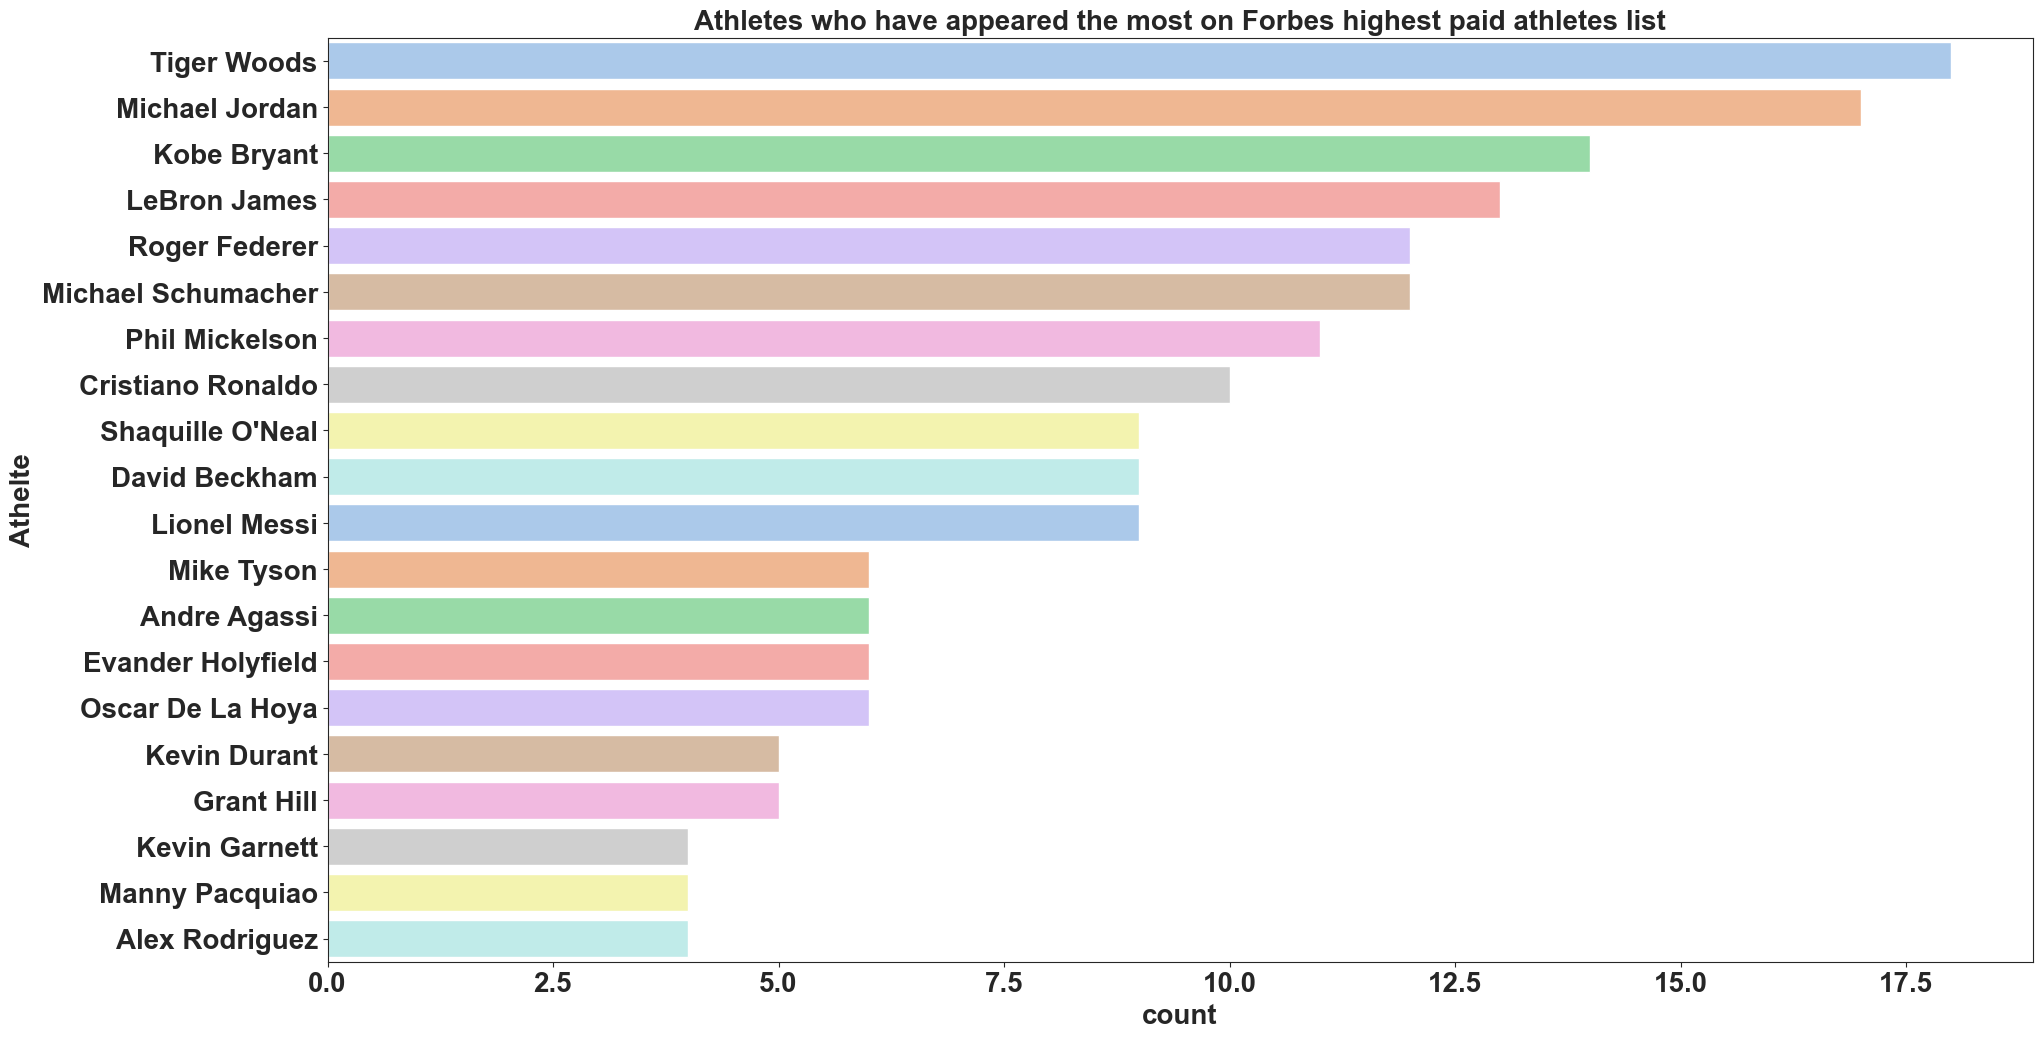

In [153]:
top20=athlete_df.groupby(['Name'])['Name'].count().reset_index(name='count').sort_values('count',ascending=False)[:20]

sns.set_style('ticks')
plt.subplots(figsize=(22,12))
sns.barplot(y='Name',x='count',data=top20,palette='pastel')
plt.xlabel("count",fontsize=20,weight='bold')
plt.ylabel("Athelte",fontsize=20,weight='bold')
plt.xticks(weight='bold',fontsize=20)
plt.yticks(weight='bold',fontsize=20)
plt.title('Athletes who have appeared the most on Forbes highest paid athletes list',weight='bold',fontsize=20)
plt.show()

# Bivariate Analysis

In [155]:
top_sum=athlete_df.groupby(['Name'])['earnings ($ million)'].sum().reset_index().sort_values('earnings ($ million)',ascending=False)[:20]
top_sum

,Name,earnings ($ million)
64,Tiger Woods,1347.0
34,LeBron James,844.8
10,Cristiano Ronaldo,787.1
56,Roger Federer,781.1
18,Floyd Mayweather,755.0
36,Lionel Messi,715.5
40,Michael Jordan,661.7
32,Kobe Bryant,601.1
42,Michael Schumacher,601.0
53,Phil Mickelson,519.9


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Tiger Woods'),
  Text(1, 0, 'LeBron James'),
  Text(2, 0, 'Cristiano Ronaldo'),
  Text(3, 0, 'Roger Federer'),
  Text(4, 0, 'Floyd Mayweather'),
  Text(5, 0, 'Lionel Messi'),
  Text(6, 0, 'Michael Jordan'),
  Text(7, 0, 'Kobe Bryant'),
  Text(8, 0, 'Michael Schumacher'),
  Text(9, 0, 'Phil Mickelson'),
  Text(10, 0, 'David Beckham'),
  Text(11, 0, 'Manny Pacquiao'),
  Text(12, 0, 'Kevin Durant'),
  Text(13, 0, 'Neymar'),
  Text(14, 0, "Shaquille O'Neal"),
  Text(15, 0, 'Mike Tyson'),
  Text(16, 0, 'Stephen Curry'),
  Text(17, 0, 'Oscar De La Hoya'),
  Text(18, 0, 'Evander Holyfield'),
  Text(19, 0, 'Kimi Raikkonen')])

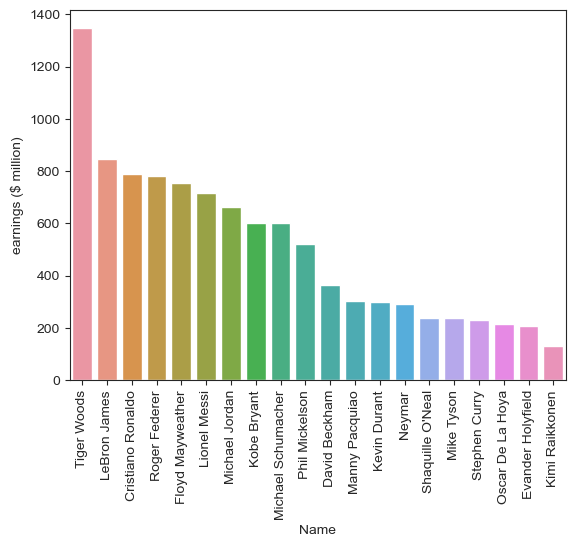

In [156]:
p = sns.barplot(data = top_sum, y = 'earnings ($ million)', x = 'Name')
plt.xticks(rotation = 90)

A check of the total earnings of each sport per year. 

In [157]:
total_sports = top_sports.sum()

In [158]:
total_sports.head()

,S.NO,Current Rank,Previous Year Rank,Year,earnings ($ million)
Sport,,,,,
american football,2790,117,597.0,28138,593.4
american football / baseball,53,3,38.0,1995,22.5
auto racing,860,89,185.0,29929,321.3
baseball,675,41,79.0,10017,128.9
basketball,12083,408,501.0,150466,3209.5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'boxing'),
  Text(1, 0, 'basketball'),
  Text(2, 0, 'auto racing'),
  Text(3, 0, 'golf'),
  Text(4, 0, 'tennis'),
  Text(5, 0, 'american football'),
  Text(6, 0, 'baseball'),
  Text(7, 0, 'ice hockey'),
  Text(8, 0, 'american football / baseball'),
  Text(9, 0, 'f1'),
  Text(10, 0, 'nascar'),
  Text(11, 0, 'soccer'),
  Text(12, 0, 'cycling'),
  Text(13, 0, 'motorcycle gp'),
  Text(14, 0, 'mma')])

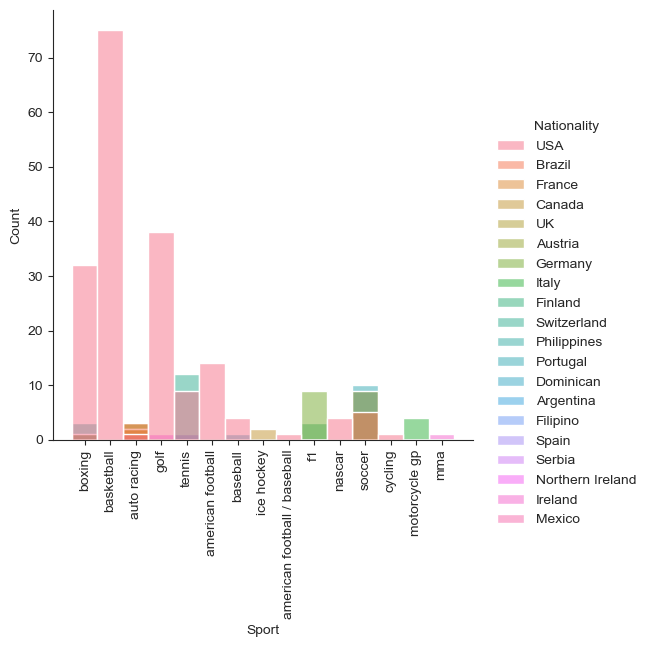

In [159]:
sns.displot(data=athlete_df, x="Sport", hue="Nationality")
plt.xticks(rotation = 90)

In [160]:
top20_country=athlete_df.groupby(by=['Nationality','Sport'])['earnings ($ million)'].sum().reset_index().sort_values('earnings ($ million)',ascending=False)
top20_country

,Nationality,Sport,earnings ($ million)
28,USA,basketball,3209.5
31,USA,golf,2016.4
29,USA,boxing,1649.2
18,Portugal,soccer,787.1
21,Switzerland,tennis,781.1
0,Argentina,soccer,715.5
24,USA,american football,593.4
12,Germany,f1,478.0
23,UK,soccer,362.4
3,Brazil,soccer,358.5


In [161]:
max_earning = top20_country.groupby(by=['Nationality'])['earnings ($ million)'].transform(max) == top20_country['earnings ($ million)'] 
max_earning

28     True
31    False
29    False
18     True
21     True
0      True
24    False
12     True
23     True
3      True
17     True
33    False
9      True
14     True
11    False
13     True
32    False
15     True
27    False
8      True
19     True
2     False
16     True
20     True
4      True
7      True
22    False
30    False
6     False
10     True
26    False
25    False
1      True
5     False
Name: earnings ($ million), dtype: bool

In [162]:
max_earning_sport_country = top20_country[max_earning].reset_index(drop=True)
max_earning_sport_country = max_earning_sport_country.drop_duplicates(subset=["Nationality", 'earnings ($ million)'], keep='last').reset_index(drop=True)[:10]
max_earning_sport_country

,Nationality,Sport,earnings ($ million)
0,USA,basketball,3209.5
1,Portugal,soccer,787.1
2,Switzerland,tennis,781.1
3,Argentina,soccer,715.5
4,Germany,f1,478.0
5,UK,soccer,362.4
6,Brazil,soccer,358.5
7,Philippines,boxing,242.0
8,Finland,f1,129.0
9,Italy,motorcycle gp,128.0


In [163]:
sport = max_earning_sport_country['Sport'].values
sport

array(['basketball', 'soccer', 'tennis', 'soccer', 'f1', 'soccer',
       'soccer', 'boxing', 'f1', 'motorcycle gp'], dtype=object)

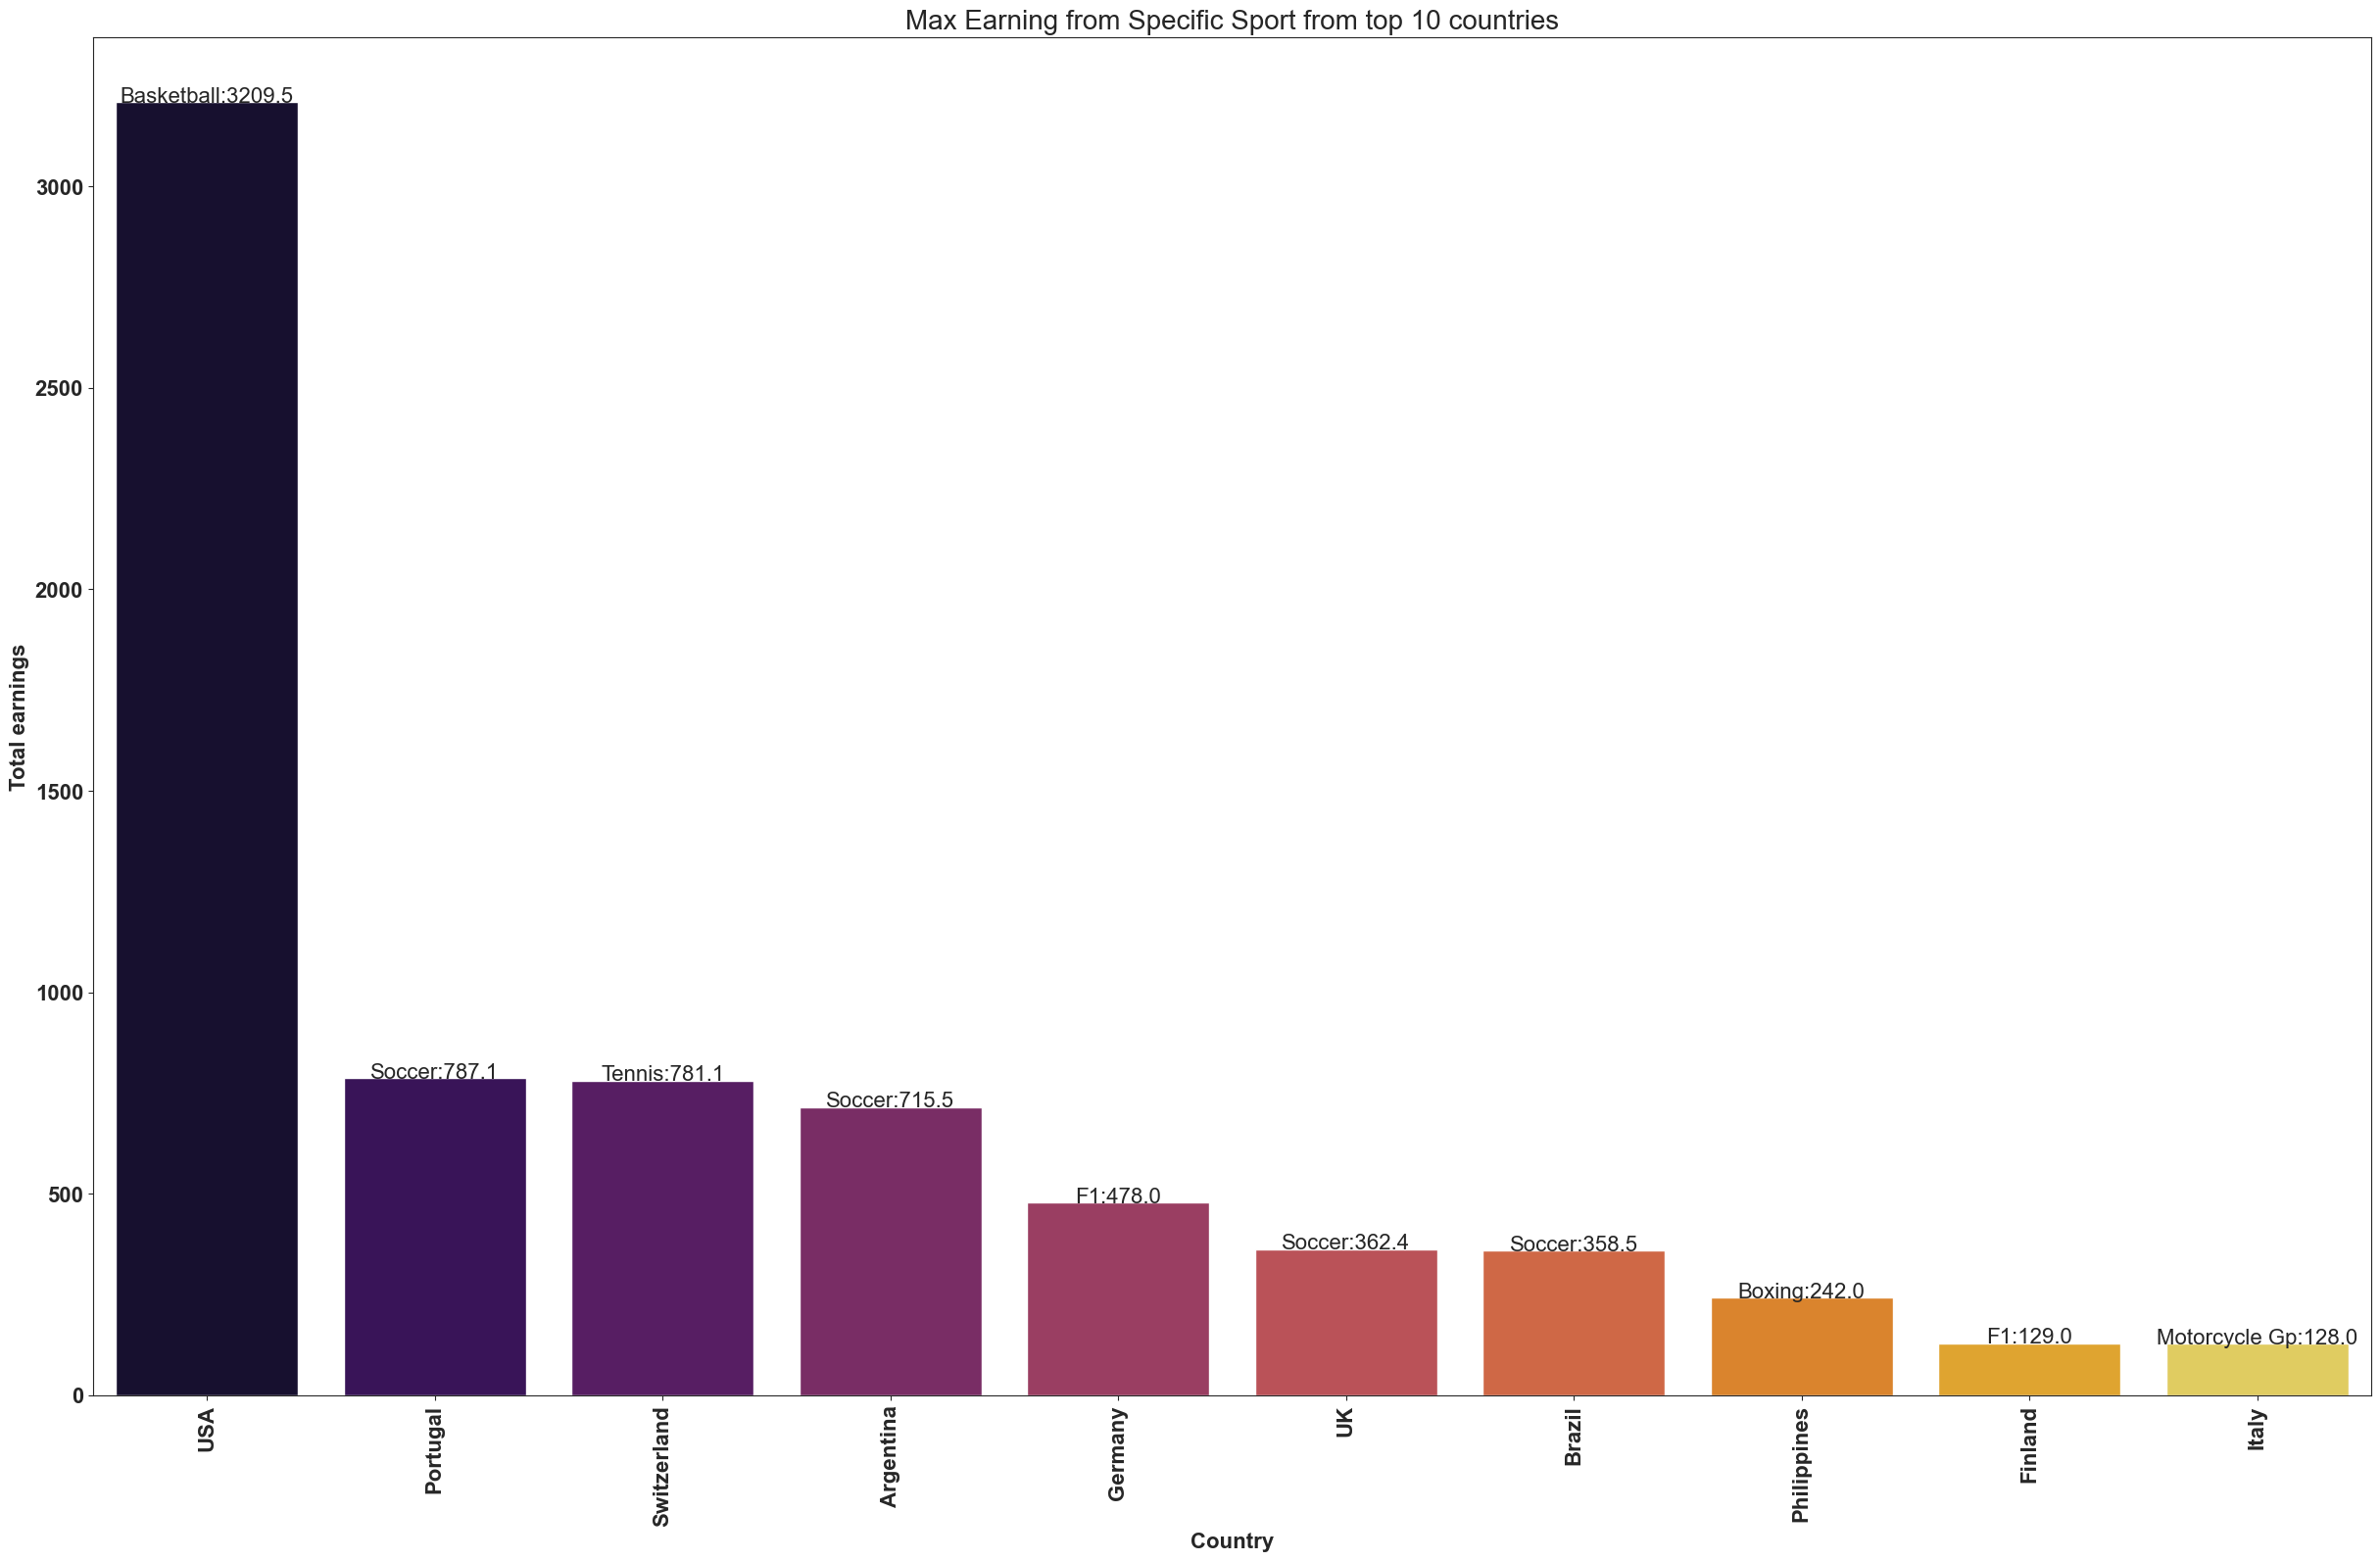

In [164]:
plt.figure(figsize=(30,18))
p=sns.barplot(x=max_earning_sport_country['Nationality'],y=max_earning_sport_country['earnings ($ million)'], data=max_earning_sport_country,palette='inferno')
index = 0
for value in max_earning_sport_country['earnings ($ million)'].values:
    p.text(index,value-0.2,str(sport[index].title() + ':' + str(value)), size=16, ha = 'center')
    index += 1

plt.title("Max Earning from Specific Sport from top 10 countries",fontsize= 20)
plt.xticks(rotation=90,weight='bold',fontsize=16)
plt.xlabel('Country',weight='bold',fontsize=16)
plt.ylabel('Total earnings',weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.show()

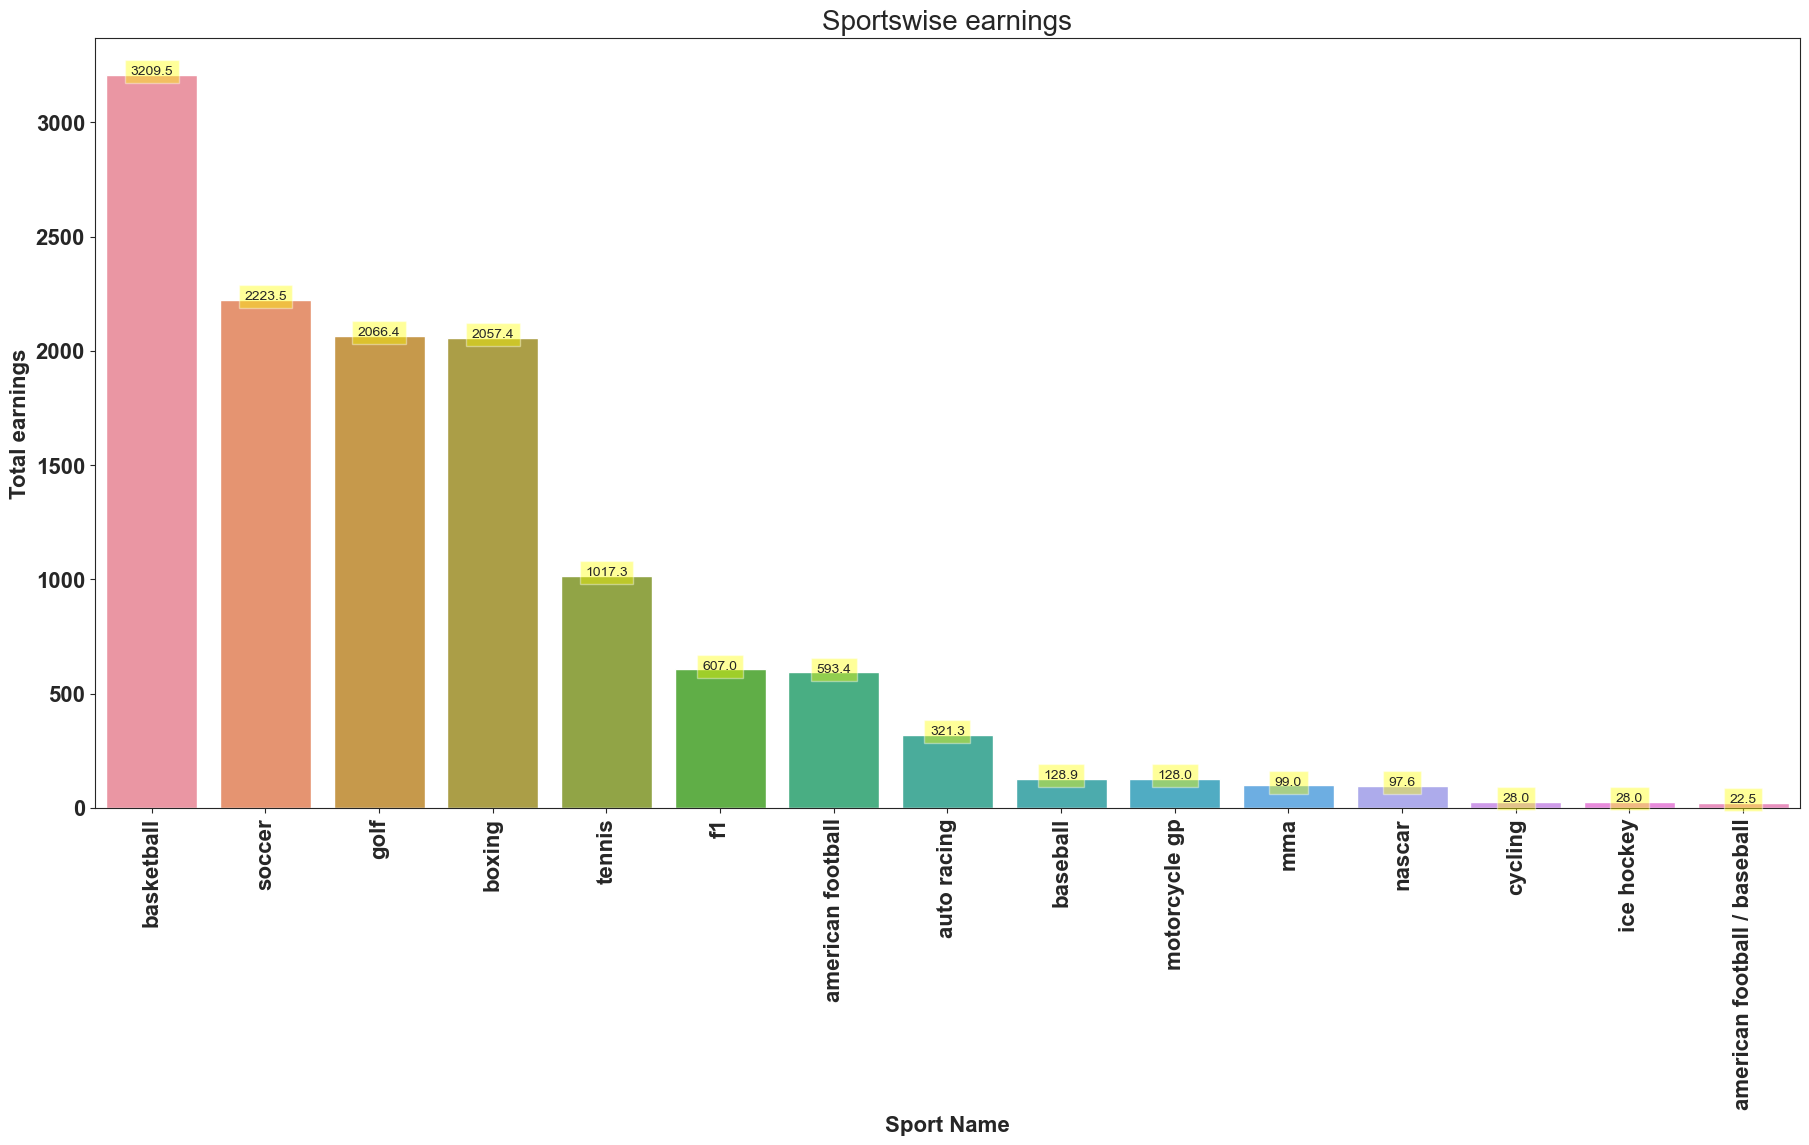

In [165]:
sports=athlete_df.groupby(by='Sport').sum().sort_values('earnings ($ million)',ascending=False)
plt.figure(figsize=(22,10))
sns.barplot(x=sports.index,y='earnings ($ million)', data=sports)
for i in range(len(sports.index)):
        plt.text(i,sports['earnings ($ million)'][i],sports['earnings ($ million)'][i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.4))

        
plt.title("Sportswise earnings",fontsize= 20)
plt.xticks(rotation=90,weight='bold',fontsize=16)
plt.xlabel('Sport Name',weight='bold',fontsize=16)
plt.ylabel('Total earnings',weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.show()

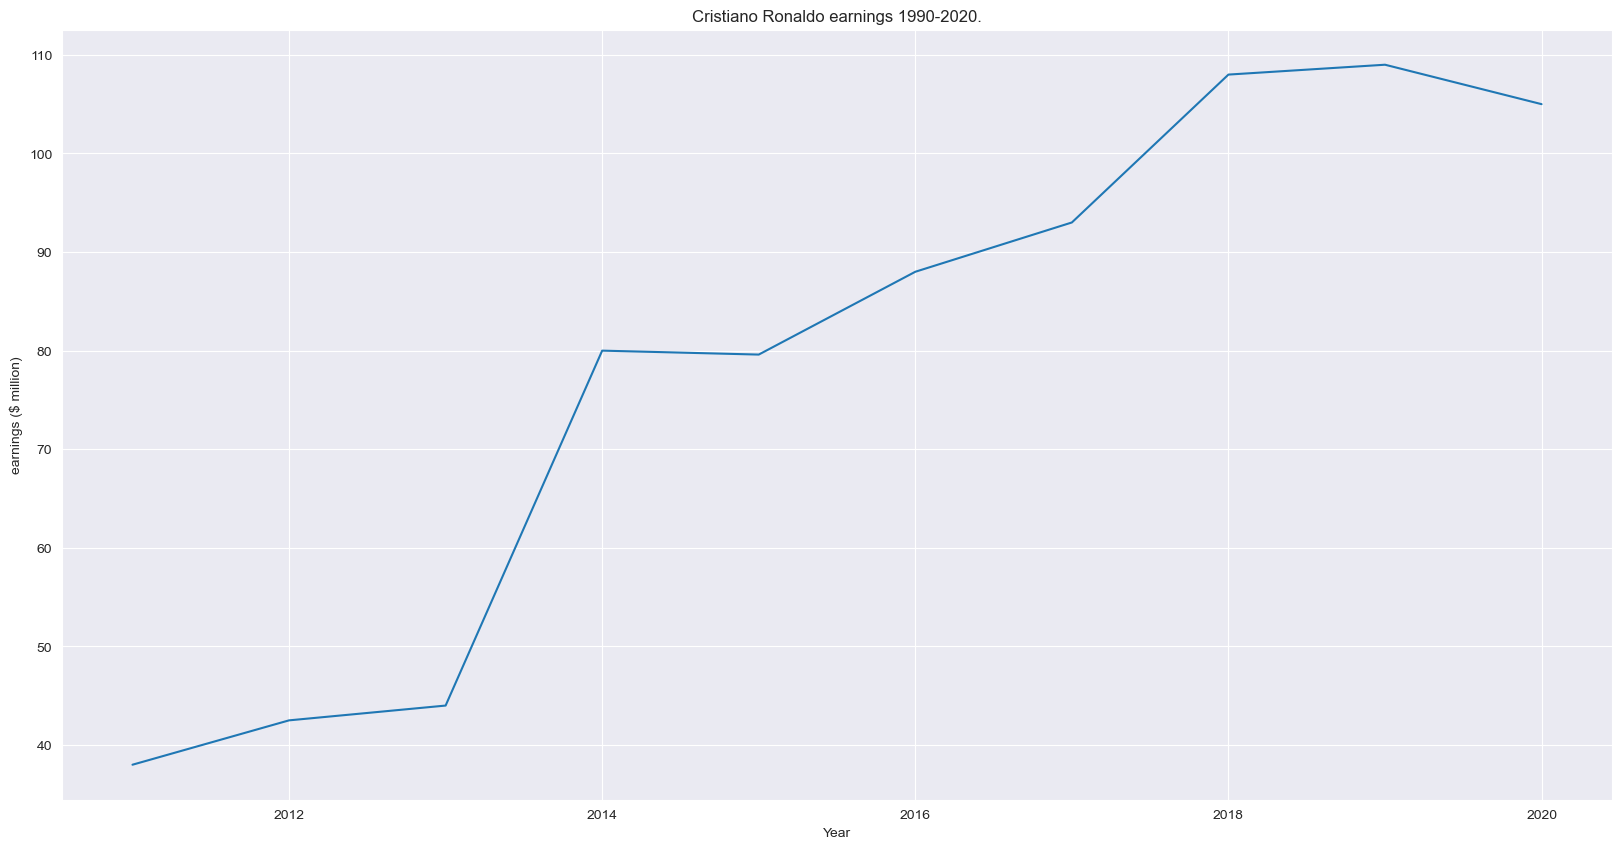

In [166]:
athlete('Cristiano Ronaldo')

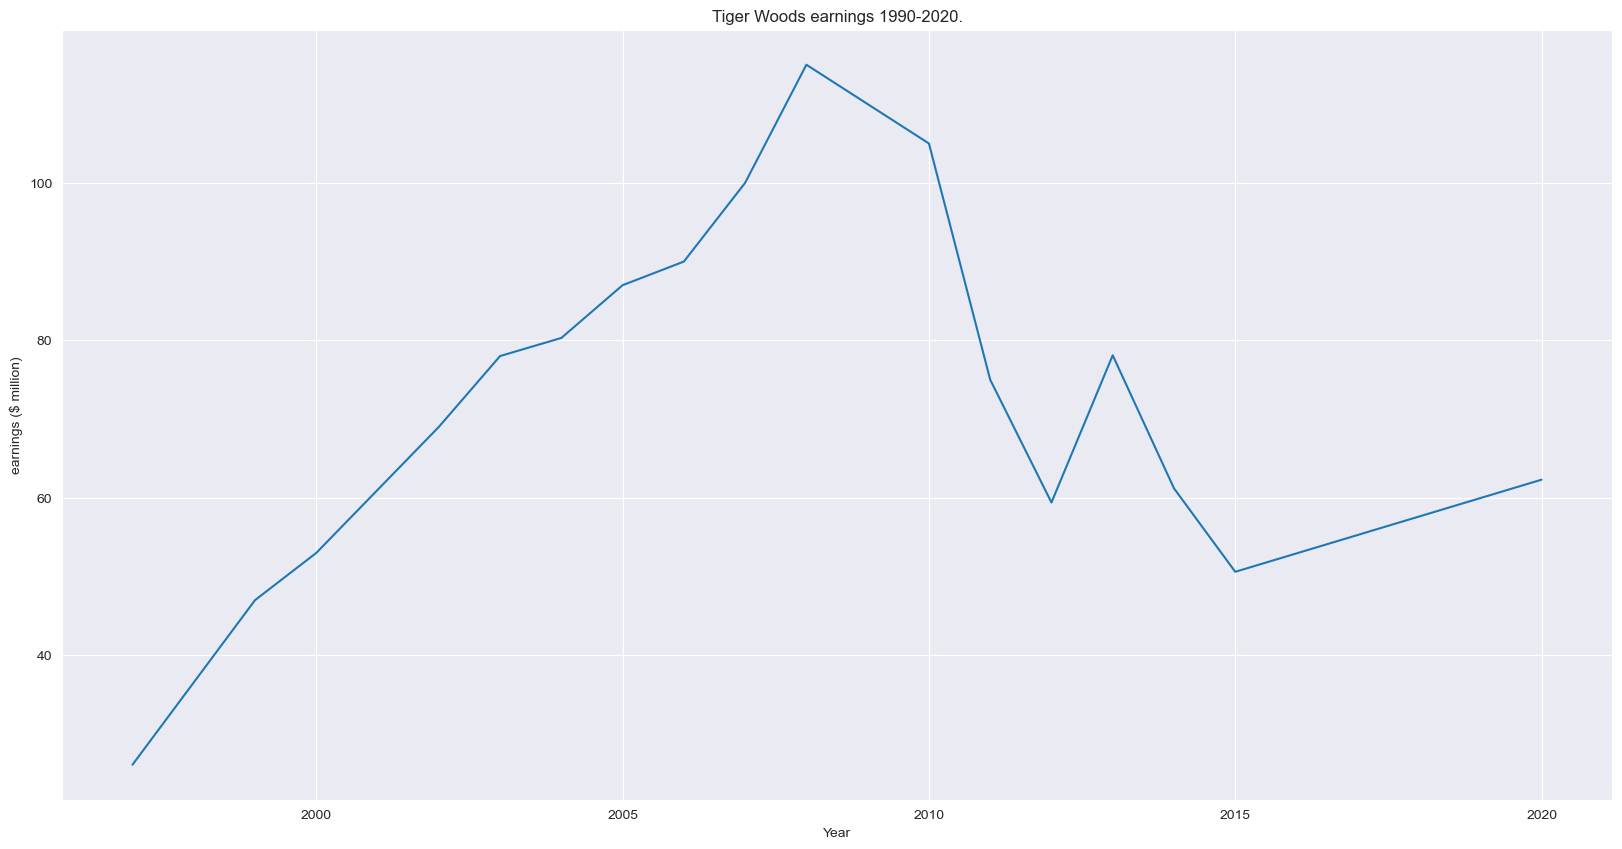

In [69]:
athlete('Tiger Woods')

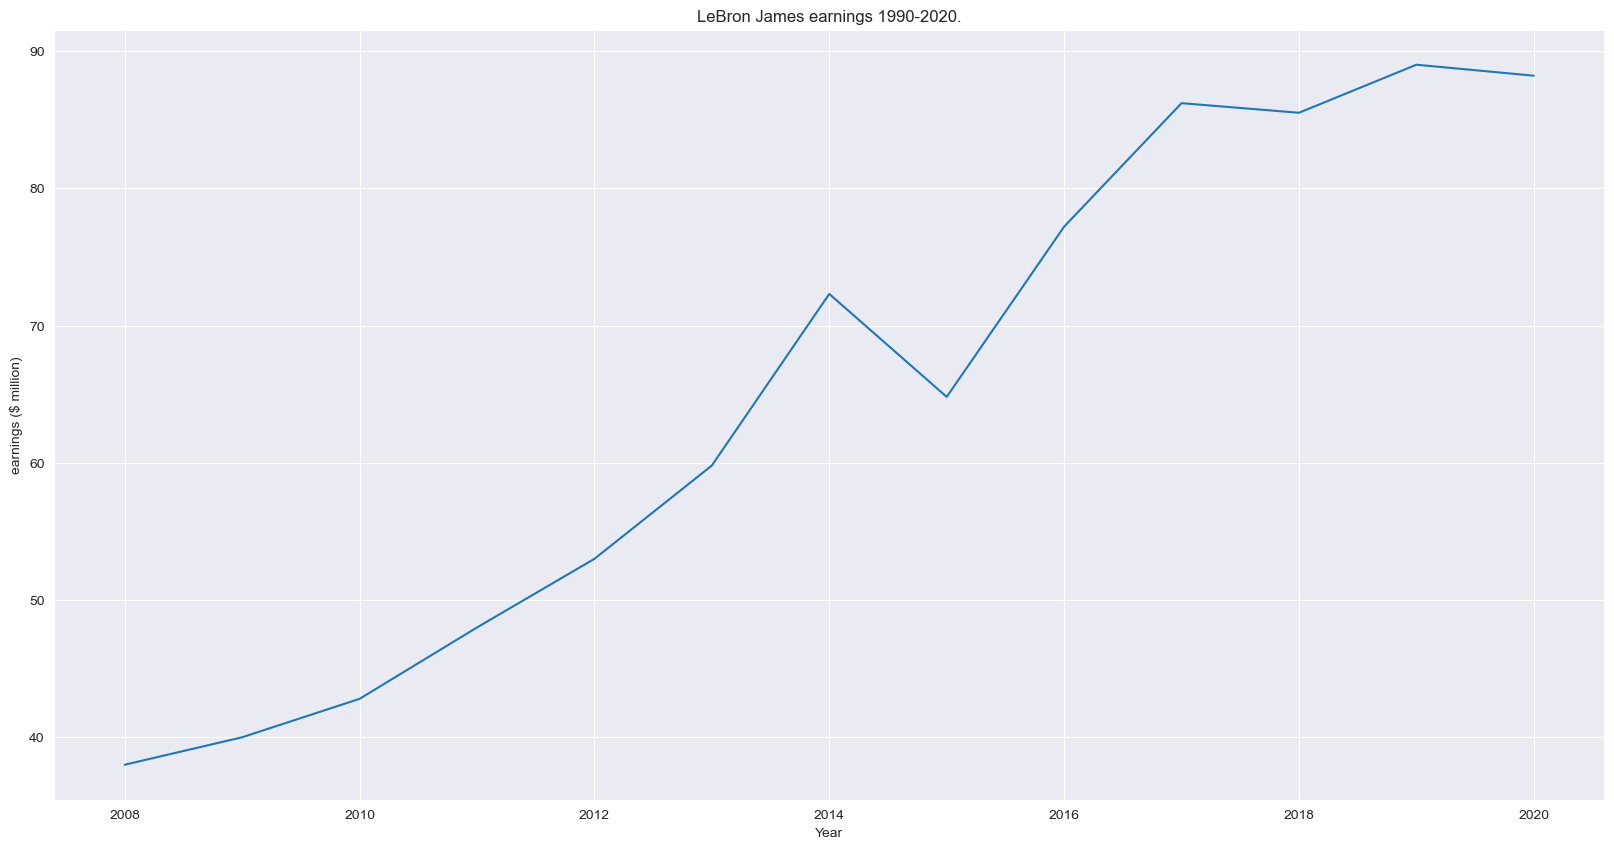

In [70]:
athlete('LeBron James')

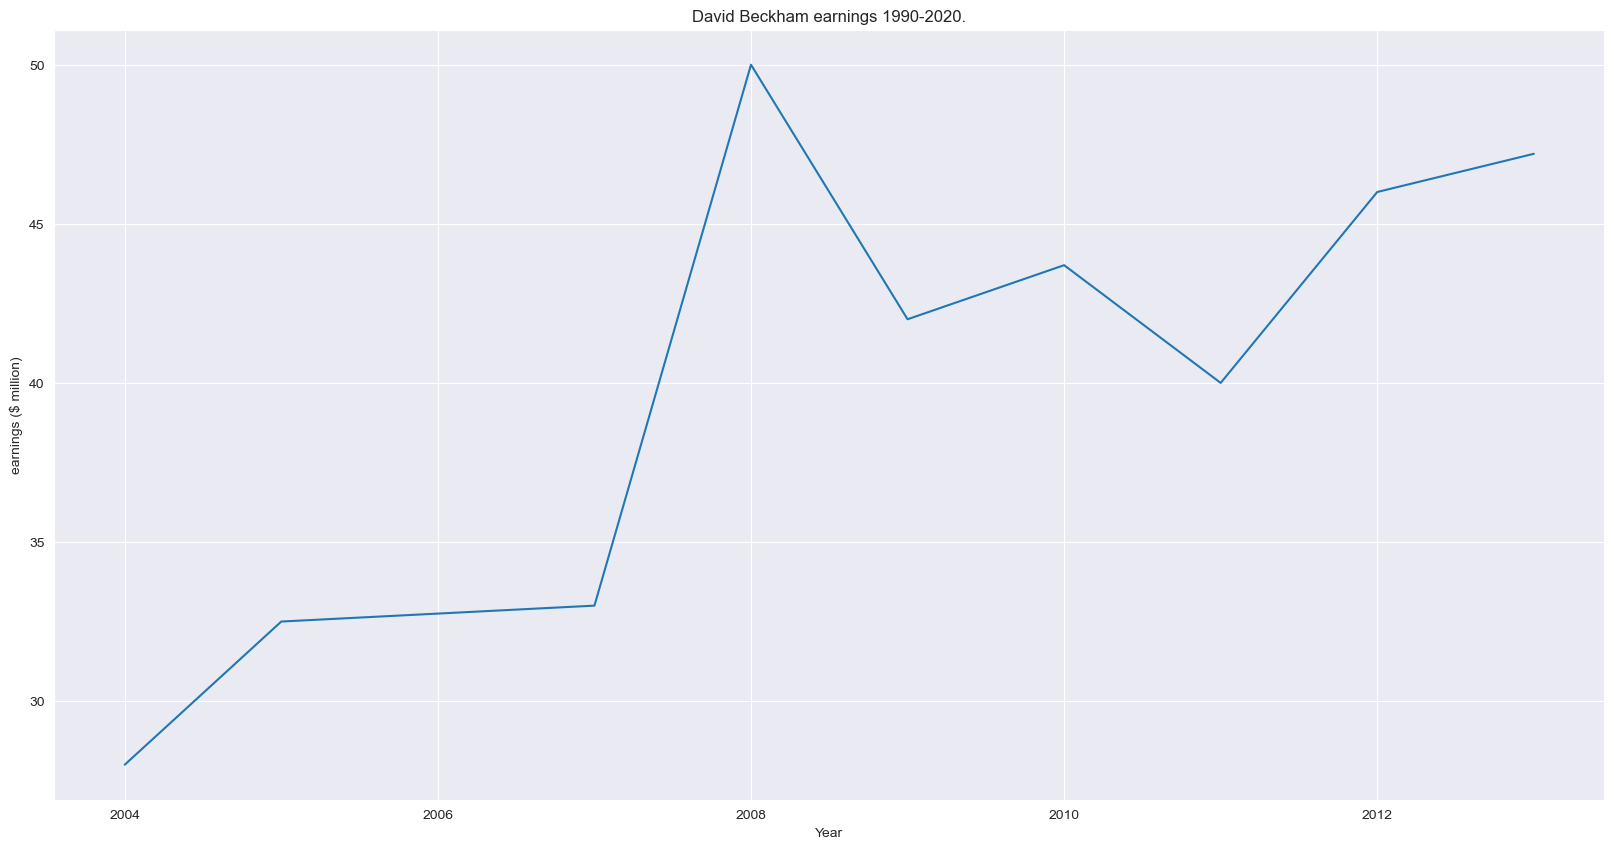

In [75]:
athlete("David Beckham")

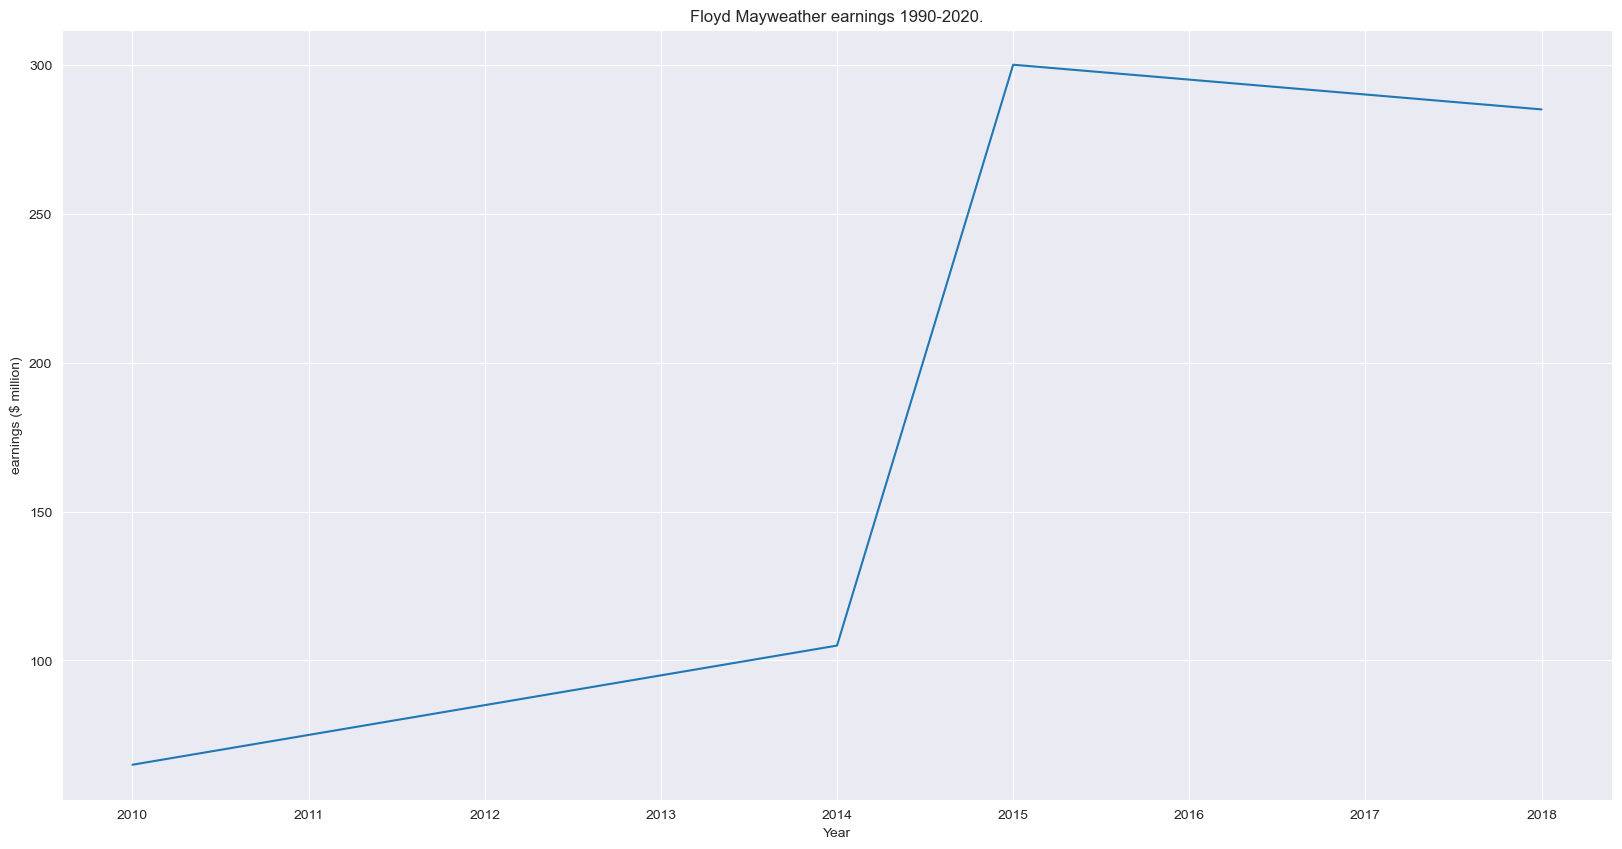

In [72]:
athlete('Floyd Mayweather')

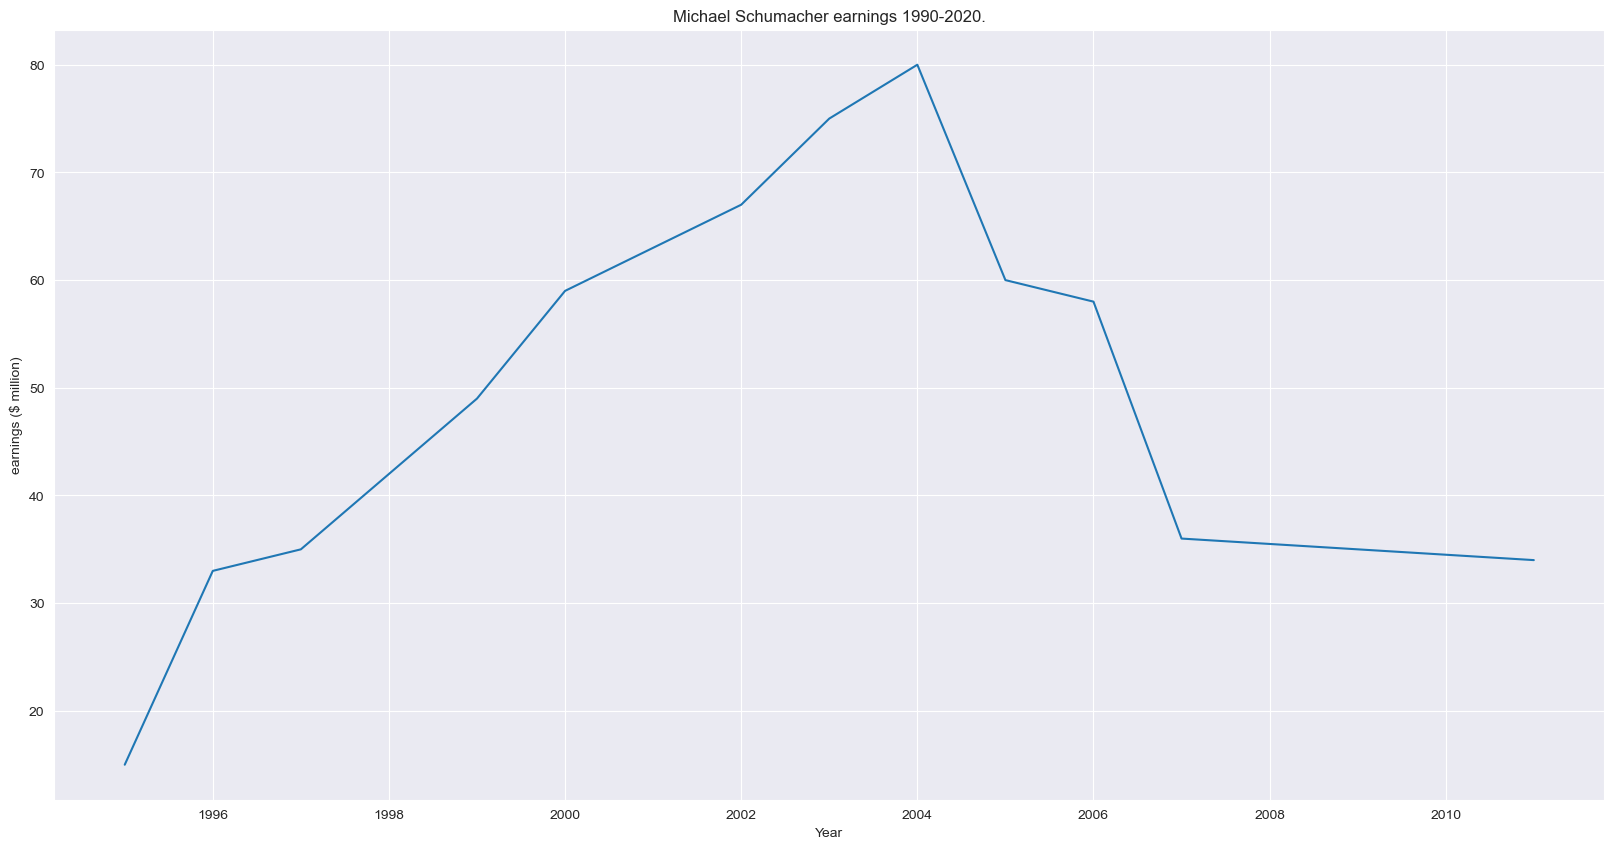

In [73]:
athlete('Michael Schumacher')

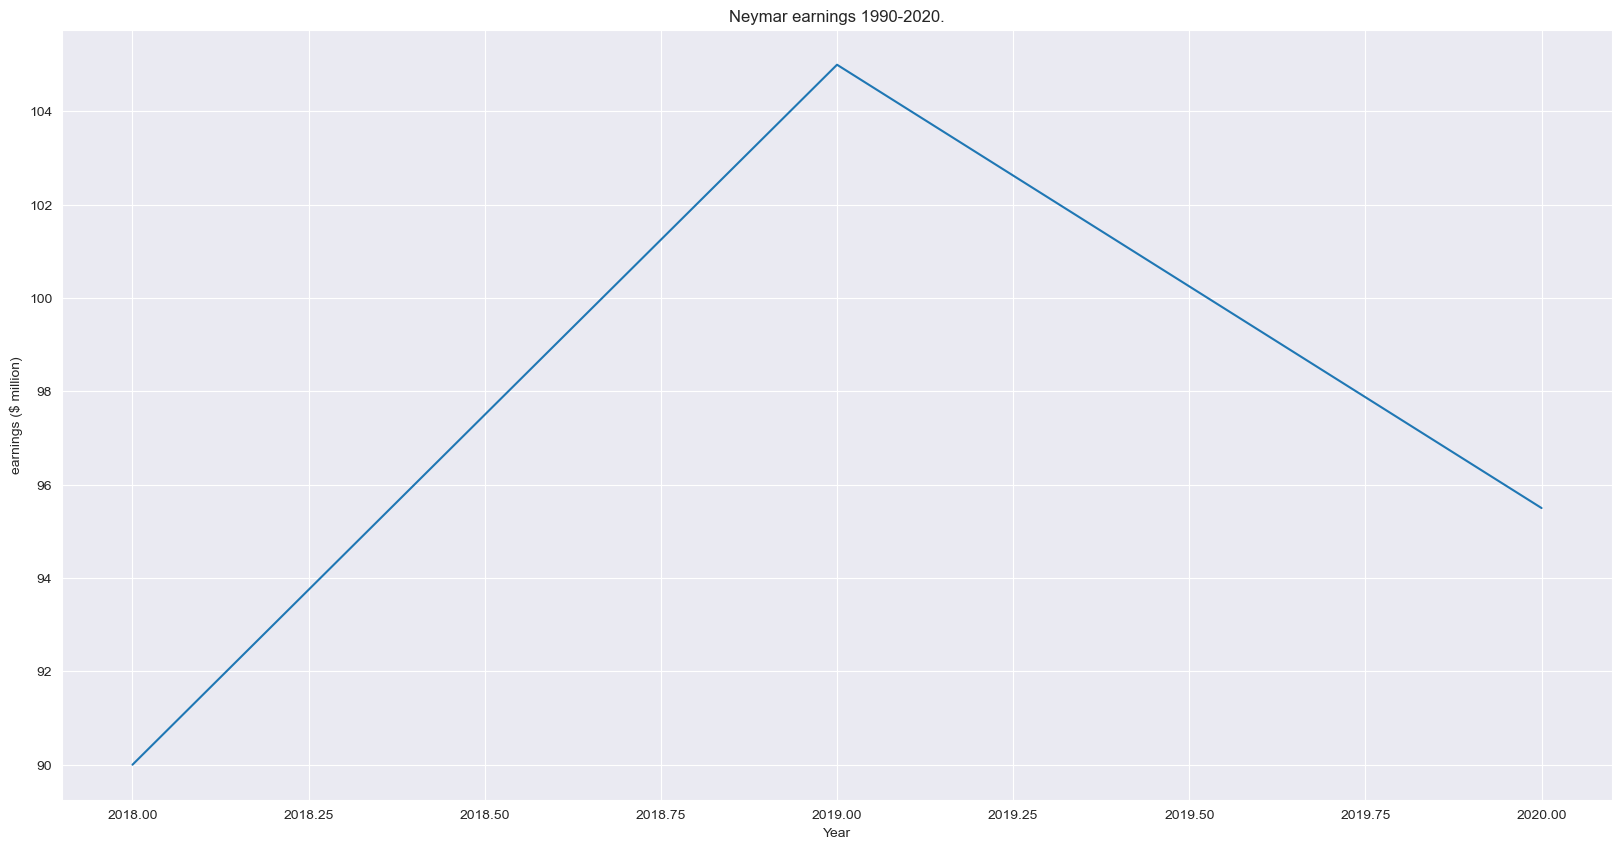

In [79]:
athlete('Neymar')

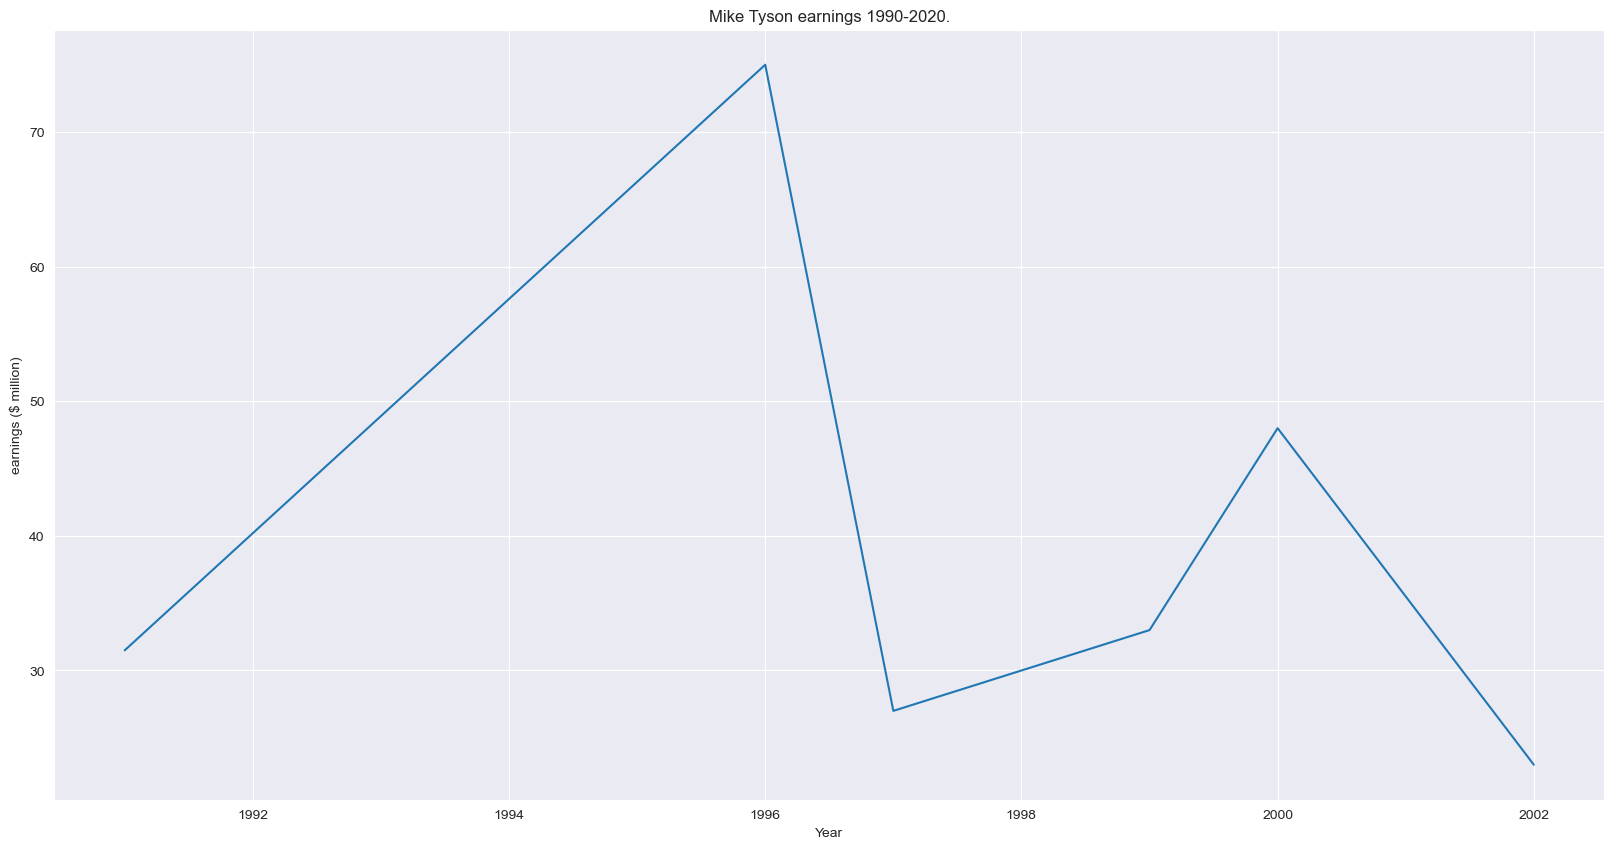

In [80]:
athlete('Mike Tyson')